In [2]:
import torch
import os, sys
import numpy as np
from skimage import segmentation
sys.path.insert(0, 'src')
from utils.utils import load_image, read_lists, ensure_dir
from utils.visualizations import show_image_rows, make_grid, histogram, bar_graph

In [82]:
n_concepts = 114
concept_indexing_path = 'saved/ace/n_800/saved/concepts-K_{}-min_20-max_40/concept_indexing.pth'.format(n_concepts)
image_paths_path = 'saved/ace/n_800/filepaths.txt'
max_show = 15
images_per_row = 5
patch_path_template = 'saved/ace/n_800/saved/image_patches/{}/patches/patch_{}.png'
superpixel_path_template = 'saved/ace/n_800/saved/image_patches/{}/superpixels/superpixel_patch_{}.png'
background_color = 0.44705883

visualization_dir = os.path.join(os.path.dirname(concept_indexing_path), 'concept_visualizations')
ensure_dir(visualization_dir)

In [83]:
concept_indexing = torch.load(concept_indexing_path)
image_paths = read_lists(image_paths_path)

def display_patch_superpixel_separately(concept_indexing,
                                        image_paths,
                                        max_show):
    for concept_idx, concept in enumerate(concept_indexing):
        image_idxs = concept['image_numbers']
        patch_idxs = concept['patch_numbers']
        n_patches = len(image_idxs)

        n_show = max_show if n_patches > max_show else n_patches
        patch_paths = []
        superpixel_paths = []
        original_image_paths = []
        for image_idx, patch_idx in zip(image_idxs[:n_show], patch_idxs[:n_show]):
            patch_path = patch_path_template.format(image_idx, patch_idx)
            superpixel_path = superpixel_path_template.format(image_idx, patch_idx)
            original_image_path = image_paths[image_idx]
            assert os.path.exists(patch_path)
            assert os.path.exists(superpixel_path)

            patch_paths.append(patch_path)
            superpixel_paths.append(superpixel_path)
            original_image_paths.append(original_image_path)

        superpixels = [load_image(path) for path in superpixel_paths]
        patches = [load_image(path) for path in patch_paths]
        patch_masks = [np.where(np.abs(np.mean(patch, axis=-1) - background_color) < 1e-5, 0, 1) for patch in patches]
        images = [load_image(path) for path in original_image_paths]

        # Mark boundaries of patches on image
        marked_images = []
        for image, patch_mask in zip(images, patch_masks):
            marked_images.append(segmentation.mark_boundaries(
                image, 
                patch_mask,
                mode='thick'))

        superpixel_rows = make_grid(superpixels, items_per_row=images_per_row)
        superpixel_save_path = os.path.join(
            visualization_dir,
            'concept_{}_superpixels.png'.format(concept_idx))
        show_image_rows(
            superpixel_rows,
            figure_title='Concept {} Superpixels'.format(concept_idx),
            save_path=superpixel_save_path)

        patches_rows = make_grid(patches, items_per_row=images_per_row)
        marked_images_rows = make_grid(marked_images, items_per_row=images_per_row)
        patches_save_path = os.path.join(
            visualization_dir,
            'concept_{}_marked_patches.png'.format(concept_idx))

        show_image_rows(
            marked_images_rows,
            figure_title='Concept {} Patches'.format(concept_idx),
            save_path=patches_save_path)


    

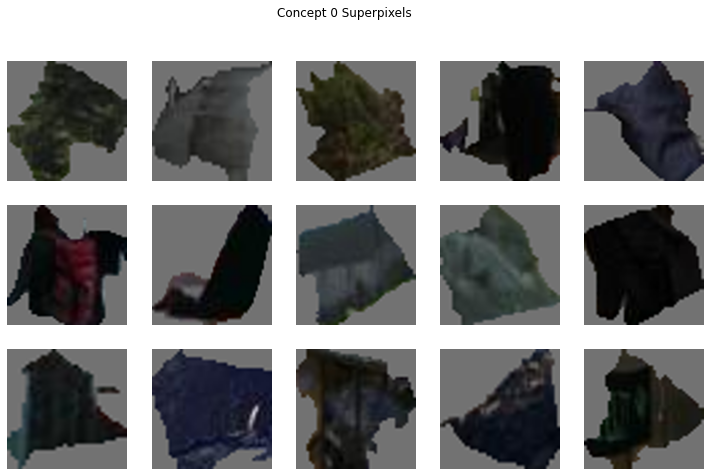

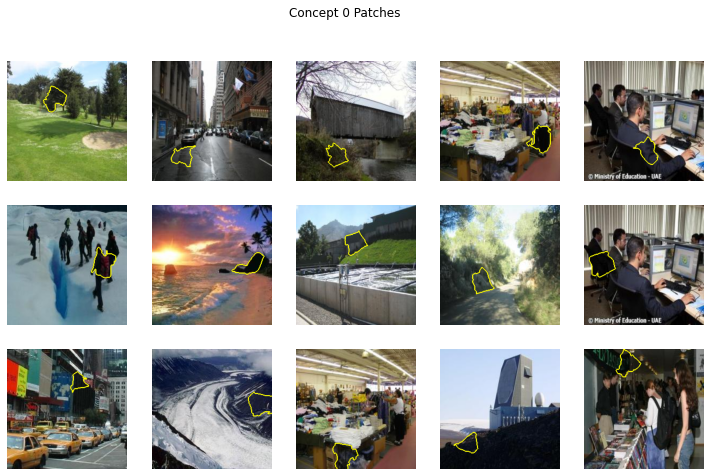

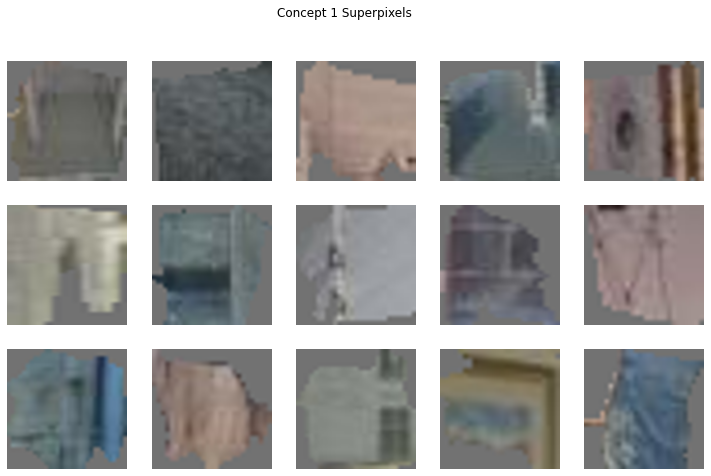

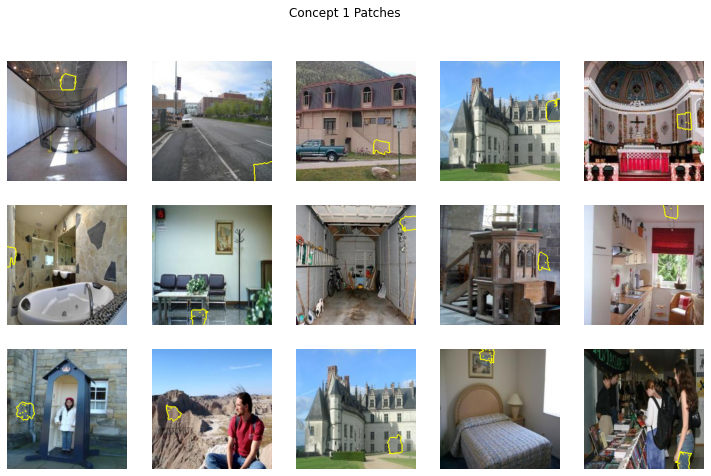

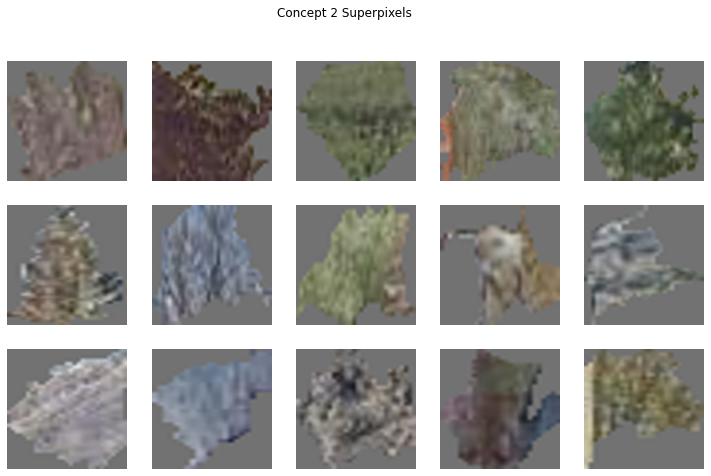

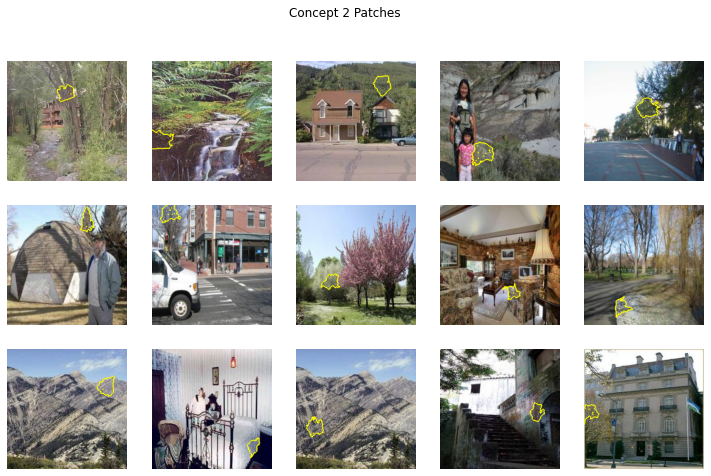

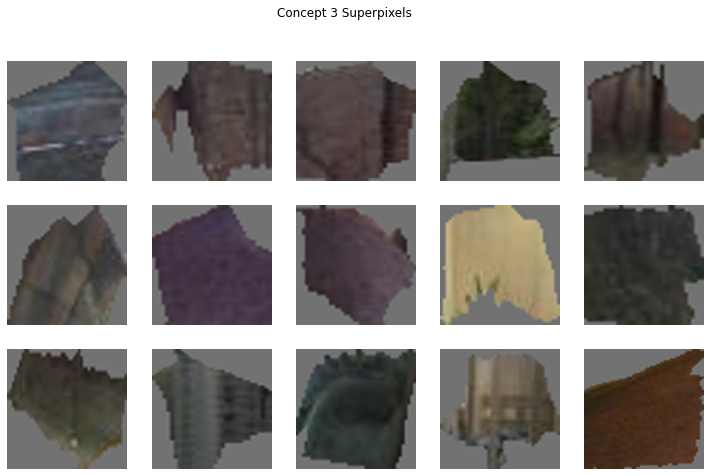

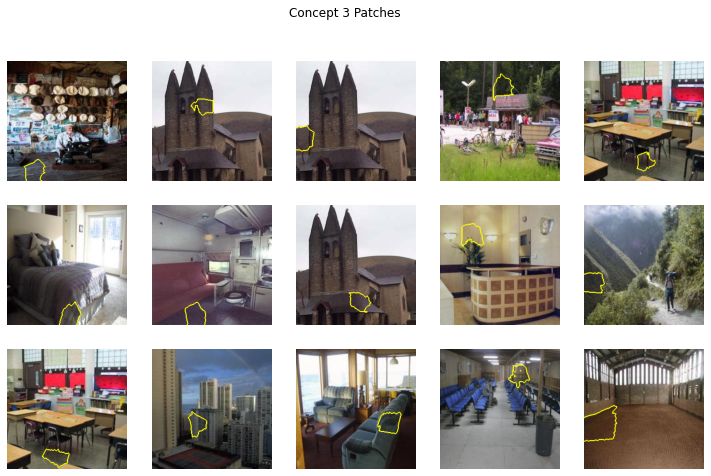

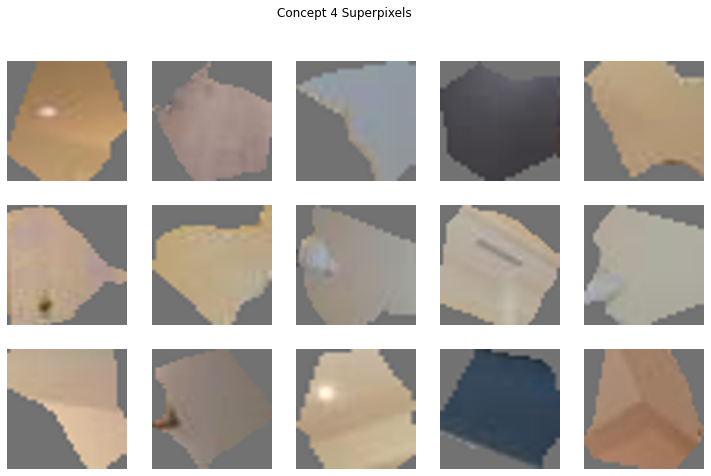

KeyboardInterrupt: 

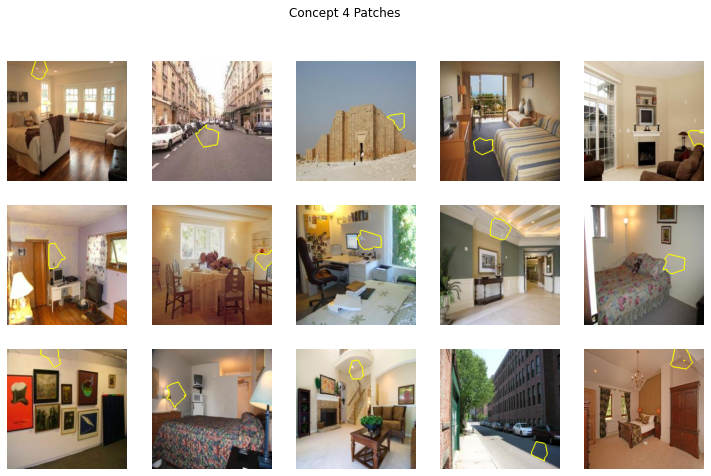

In [84]:
display_patch_superpixel_separately(
    concept_indexing=concept_indexing,
    image_paths=image_paths,
    max_show=max_show)

    

### Show top activating patches and location in full image for each concept

In [87]:
def display_patch_superpixel_together(concept_indexing,
                                        image_paths,
                                        max_show,
                                      concept_idxs=None):
    if concept_idxs is not None:
        concept_indexing = [concept_indexing[i] for i in concept_idxs]
        # image_patchs = [image_paths[i] for i in concept_idxs]

    for concept_idx, concept in zip(concept_idxs, concept_indexing):
        image_idxs = concept['image_numbers']
        patch_idxs = concept['patch_numbers']
        n_patches = len(image_idxs)

        n_show = max_show if n_patches > max_show else n_patches
        patch_paths = []
        superpixel_paths = []
        original_image_paths = []
        
        for image_idx, patch_idx in zip(image_idxs[:n_show], patch_idxs[:n_show]):
            patch_path = patch_path_template.format(image_idx, patch_idx)
            superpixel_path = superpixel_path_template.format(image_idx, patch_idx)

            original_image_path = image_paths[image_idx]
            assert os.path.exists(patch_path)
            assert os.path.exists(superpixel_path)

            patch_paths.append(patch_path)
            superpixel_paths.append(superpixel_path)
            original_image_paths.append(original_image_path)

        superpixels = [load_image(path) for path in superpixel_paths]
        patches = [load_image(path) for path in patch_paths]
        patch_masks = [np.where(np.abs(np.mean(patch, axis=-1) - background_color) < 1e-5, 0, 1) for patch in patches]
        images = [load_image(path) for path in original_image_paths]

        # Mark boundaries of patches on image
        marked_images = []
        for image, patch_mask in zip(images, patch_masks):
            marked_images.append(segmentation.mark_boundaries(
                image, 
                patch_mask,
                mode='thick'))

        superpixel_rows = make_grid(superpixels, items_per_row=images_per_row)
        patches_rows = make_grid(patches, items_per_row=images_per_row)
        marked_images_rows = make_grid(marked_images, items_per_row=images_per_row)
        display_rows = []
        row_labels = []
        
        for superpixel_row, marked_image_row in zip(superpixel_rows, marked_images_rows):
            display_rows.append(superpixel_row)
            display_rows.append(marked_image_row)
            
            row_labels.append('Superpixels')
            row_labels.append('Patches')
        
        save_path = os.path.join(
            visualization_dir, 
            'concept_{}.png'.format(concept_idx))
        show_image_rows(
            display_rows,
            figure_title='Concept {}'.format(concept_idx),
            row_labels=row_labels,
        save_path=save_path)

concept indices: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


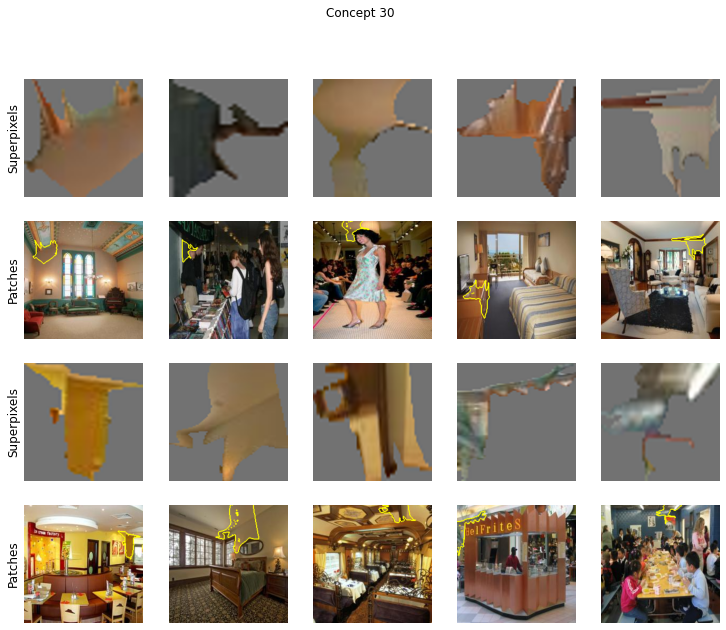

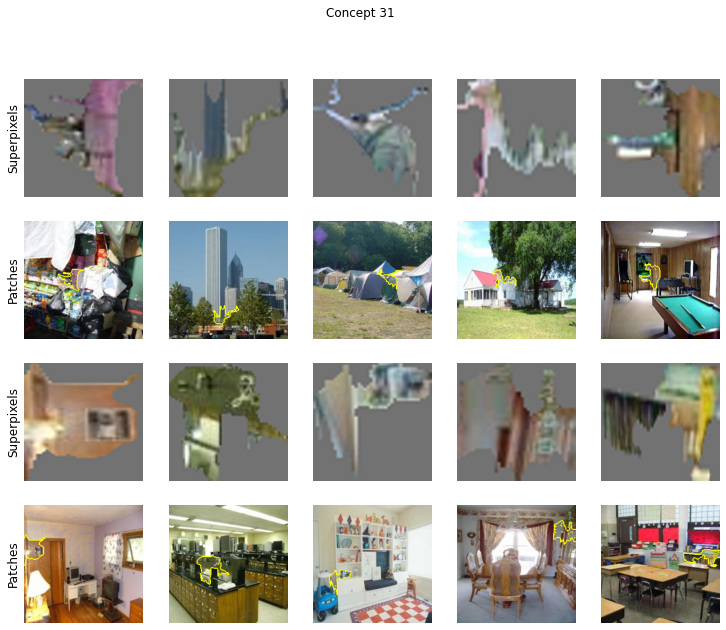

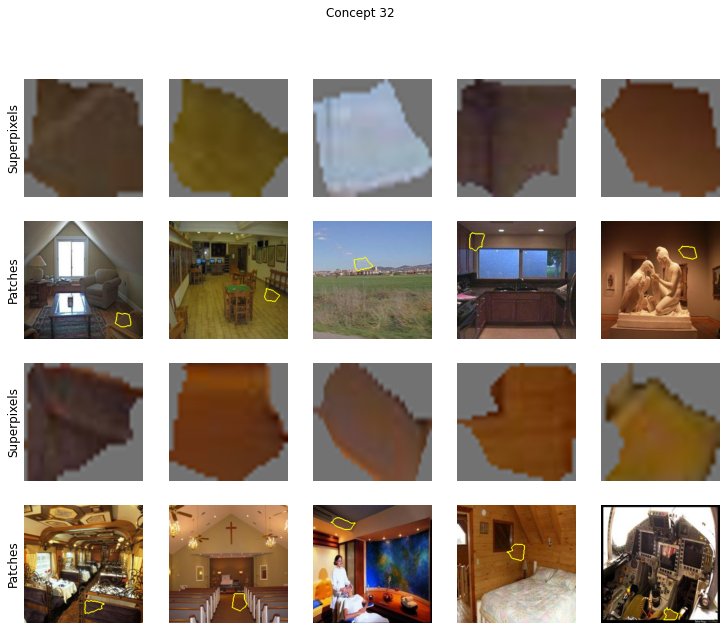

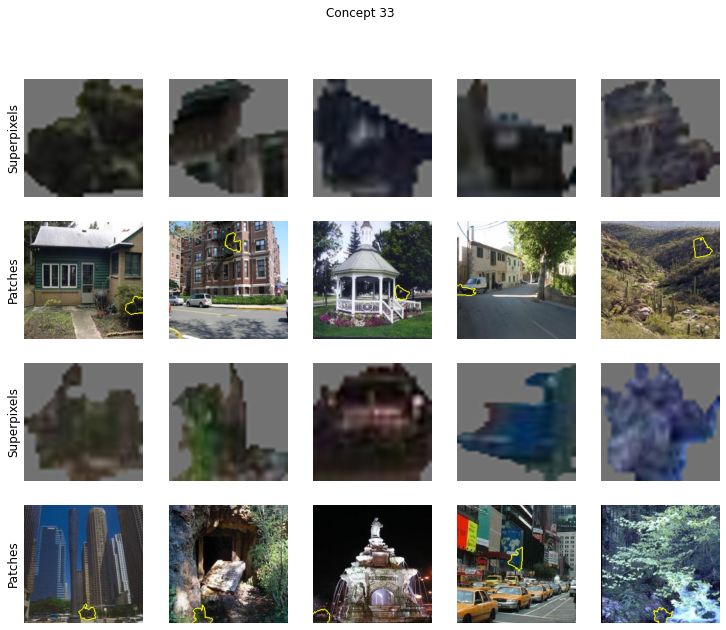

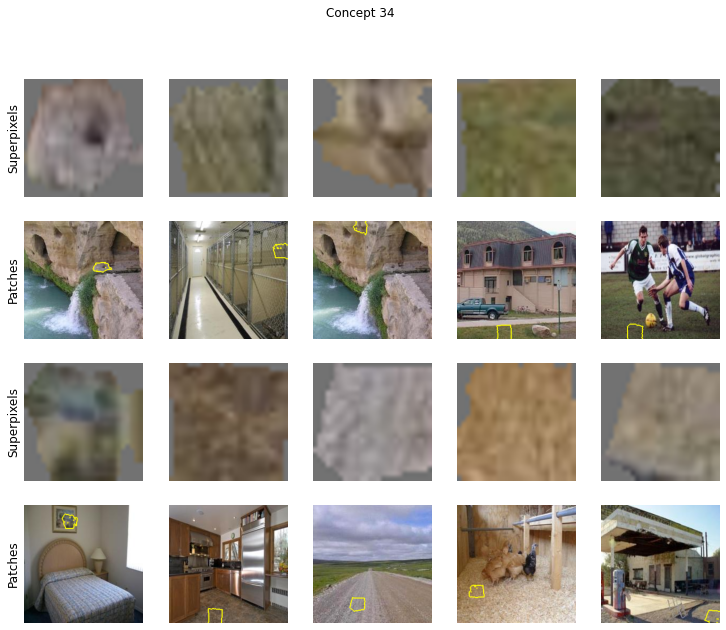

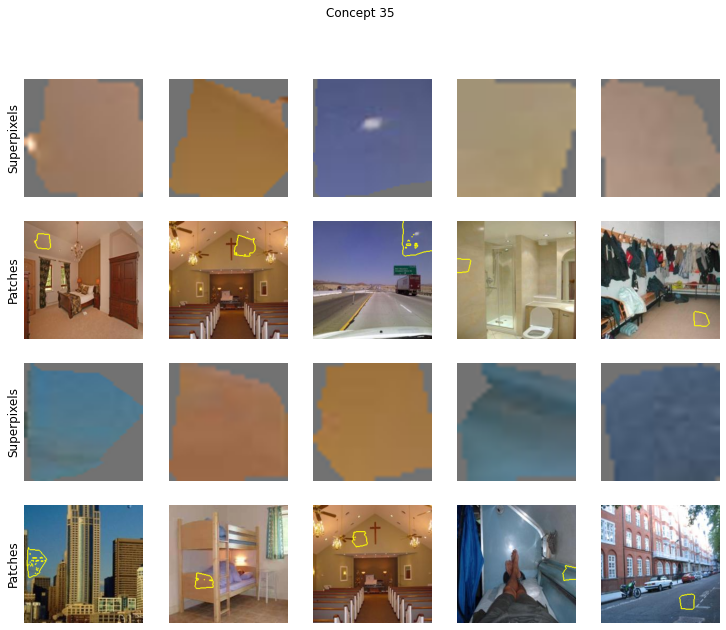

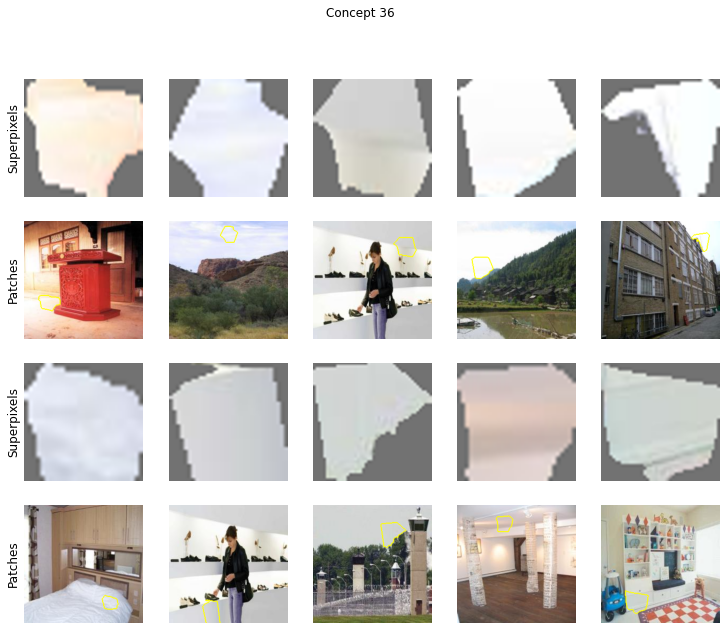

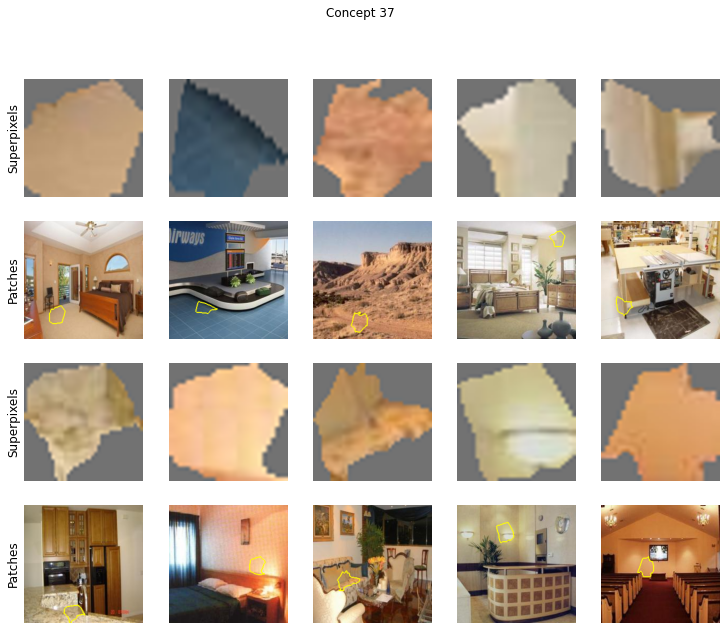

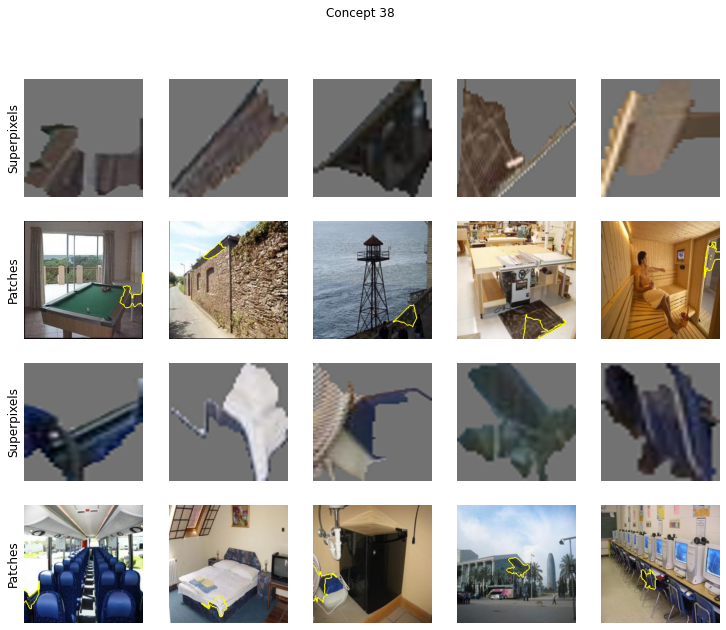

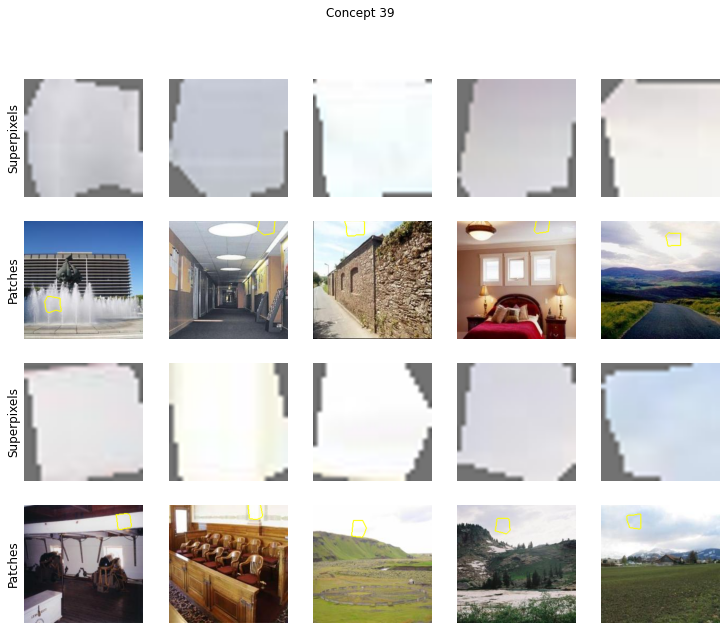

In [91]:
cur_max_show = 10
concept_start_idx = 30
concept_stop_idx = 40
concept_idxs = [i for i in range(concept_start_idx, concept_stop_idx)]
print("concept indices: {}".format(concept_idxs))
display_patch_superpixel_together(
    concept_indexing=concept_indexing,
    image_paths=image_paths,
    max_show=cur_max_show,
    concept_idxs=concept_idxs)

### Analysis into concept presence vector results 
Given concept presence vectors for certain images, calculate:
* In each image, how many concepts are present?
* In each image visualize the concepts present.
* For each concept, what % of images is it present in?

In [ ]:
#### Define functions

In [20]:
def per_image_analysis(image_paths,
                       presence_vectors,
                       mode=''):
    n_concepts = presence_vectors.shape[1]
    n_concepts_per_image = np.sum(presence_vectors, axis=1)
    
    histogram(
        data=n_concepts_per_image,
        data_range=[0, n_concepts+1],
        xlim=[0, n_concepts+1],
        xlabel='Number of concepts in image',
        ylabel='Number of images',
        title='Distribution of concepts/image for {}'.format(mode),
        show=True)
    

    

In [21]:
def per_concept_analysis(presence_vectors,
                         mode):
    n_images_per_concept = np.sum(presence_vectors, axis=0)
    n_images = presence_vectors.shape[0]
    sort_idxs = np.argsort(-n_images_per_concept)

    # Histogram of distribution of number of images each concept appears in
    histogram(
        data=n_images_per_concept,
        data_range=[0, n_images+1],
        n_bins=20,
        xlim=[0, n_images+1],
        xlabel='Number of images/concept',
        ylabel='Number of concepts',
        title='Distribution of images/concept for {}'.format(mode),
        show=True)
    
    # Bar graph showing how many images each concept appears in
    sorted_n_images_per_concept = n_images_per_concept[sort_idxs]
    concept_idxs = np.array([i for i in range(len(n_images_per_concept))])
    sorted_concept_idxs = concept_idxs[sort_idxs]
    bar_graph(
        data=[sorted_n_images_per_concept],
        labels=sorted_concept_idxs,
        xlabel='Concept Index',
        ylabel='Number of Images Concept Occurs In',
        title='Frequency of Concepts for {} Sorted by Freq.'.format(mode),
        show=True)
    


#### Set variables

In [65]:
mode = [
    ('max', 0.2),
    ('max', 0.5),
    ('max', 0.8),
    ('max', 0.95),
    ('average', 0.2),
    ('average', 0.5),
    ('average', 0.55),
    ('average', 0.65),
    ('average', 0.8)
]
pooling_mode = 'average'
presence_threshold = 0.45

n_samples = 100
split = 'test'
pv_path_template = os.path.join('saved/ace/n_800/saved/concepts-K_{}-min_20-max_40',
                                'presence_vectors',
                                '{}_{}', # pooling_mode, presence_threshold
                                '{}_{}presence_vectors.pth') # split, n_samples
pv_path = pv_path_template.format(
    n_concepts,
    pooling_mode,
    presence_threshold,
    split,
    n_samples)
# pv_path = os.path.join('saved/ace/n_800/saved/concepts-K_{}-min_20-max_40'.format(n_concepts),
#                                 'presence_vectors',
#                                 '{}_{}'.format(pooling_mode, presence_threshold),
#                                 '{}_{}presence_vectors.pth'.format(split, n_samples))

if not os.path.exists(pv_path):
    raise ValueError("No file exists at {}".format(pv_path))
pvs = torch.load(pv_path)

image_paths_path = 'data/ade20k/full_ade20k_{}_paths.txt'.format(split)
image_paths = read_lists(image_paths_path)[:n_samples]



#### Run analyses

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


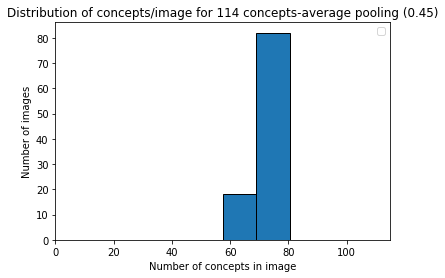

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


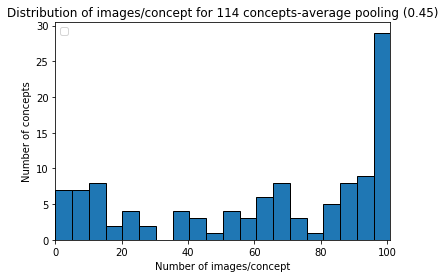

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

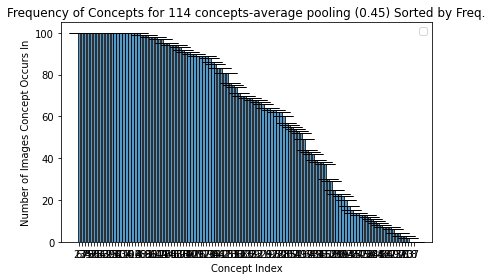

In [66]:
per_image_analysis(
    image_paths=image_paths,
    presence_vectors=pvs,
    mode='{} concepts-{} pooling ({})'.format(n_concepts, pooling_mode, presence_threshold))

per_concept_analysis(
    presence_vectors=pvs,
    mode='{} concepts-{} pooling ({})'.format(n_concepts, pooling_mode, presence_threshold))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(4442, 114)


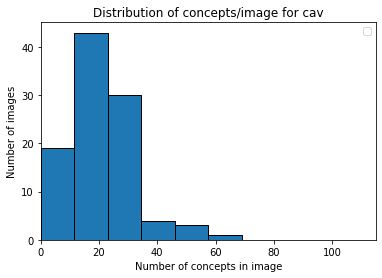

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


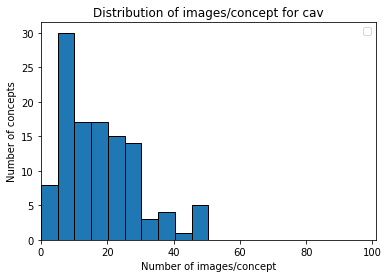

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

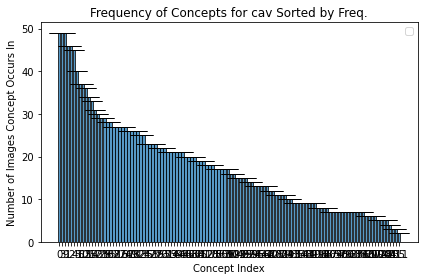

In [29]:
cav_presence_vector_path = 'data/explainer_inputs/ade20k/concepts/cav/filter_attr_300/dense_cav_attributes.pth'
cav_pv = torch.load(cav_presence_vector_path)
print(cav_pv['test'].shape)
per_image_analysis(
    image_paths=image_paths,
    presence_vectors=cav_pv['test'][:100],
    mode='cav')

per_concept_analysis(
    presence_vectors=cav_pv['test'][:100],
    mode='cav')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(4442, 114)


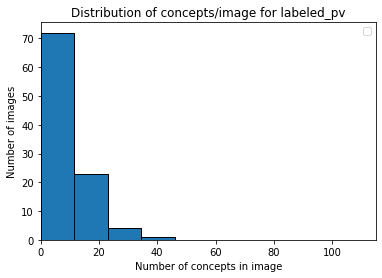

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


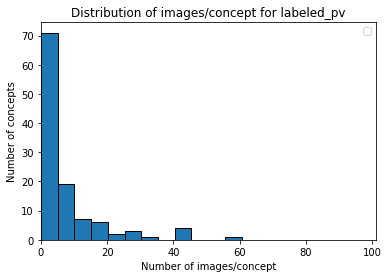

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

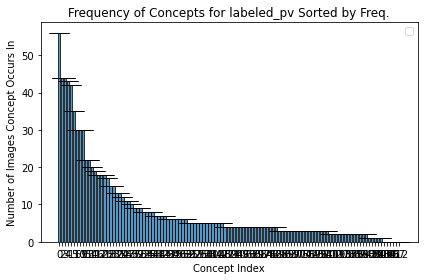

In [30]:
labeled_presence_vector_path = 'data/explainer_inputs/ade20k/concepts/labeled/filter_attr_300/splits_dense_one_hot_attributes.pth'
labeled_pv = torch.load(labeled_presence_vector_path)
print(labeled_pv['test'].shape)
per_image_analysis(
    image_paths=image_paths,
    presence_vectors=labeled_pv['test'][:100],
    mode='labeled_pv')

per_concept_analysis(
    presence_vectors=labeled_pv['test'][:100],
    mode='labeled_pv')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(4442, 114)


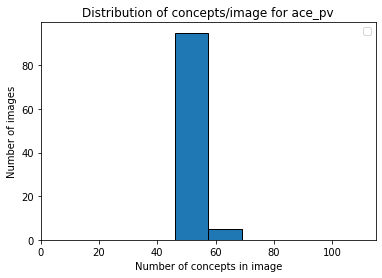

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


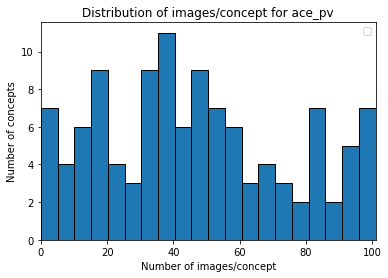

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

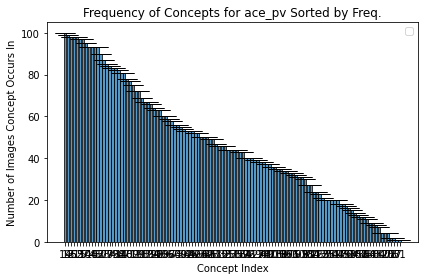

In [31]:
# New
ace_presence_vector_path = 'data/explainer_inputs/ade20k/concepts/ace/n_800-concept_{}-min_20-max_40/average_0.6_dense_one_hot_attributes.pth'.format(
    n_concepts)
# Old
ace_presence_vector_path = 'data/explainer_inputs/ade20k/concepts/ace/n_800-concept_{}-min_20-max_40/splits_dense_one_hot_attributes.pth'.format(
    n_concepts)
labeled_pv = torch.load(ace_presence_vector_path)
print(labeled_pv['test'].shape)
per_image_analysis(
    image_paths=image_paths,
    presence_vectors=labeled_pv['test'][:100],
    mode='ace_pv')

per_concept_analysis(
    presence_vectors=labeled_pv['test'][:100],
    mode='ace_pv')

